In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

plt.style.use("ggplot")

import nltk


In [2]:
# download vader from nltk
nltk.download("vader_lexicon")

# creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\smath\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv("data/cleaned_reviews.csv")


In [5]:
df.shape


(1299, 3)

In [6]:
df.head()


,Rating,Comments,Product Name
0,5,Very useful but calibration facility not avail...,omran 7120
1,5,The rate offered was much lower than Amazon an...,omran 7120
2,4,Nice product its genuine....it is a good conpa...,omran 7120
3,5,"Awesome , accurate",omran 7120
4,5,Better product,omran 7120


In [7]:
df["Comments"][0]


'Very useful but calibration facility not available even to date'

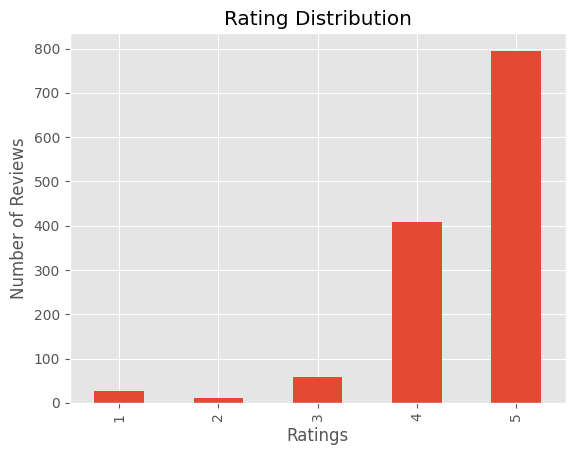

In [8]:
ax = (
    df["Rating"]
    .value_counts()
    .sort_index()
    .plot(kind="bar", title="Rating Distribution")
)
ax.set_xlabel("Ratings")
ax.set_ylabel("Number of Reviews")
plt.show()


In [9]:
df["review_length"] = df["Comments"].apply(lambda x: len(x))

# Calculate the number of tokens (words) in each review
df["token_count"] = df["Comments"].apply(lambda x: len(x.split()))

# Display the first few rows of the dataframe to confirm the new columns are added correctly
df.head()


,Rating,Comments,Product Name,review_length,token_count
0,5,Very useful but calibration facility not avail...,omran 7120,63,10
1,5,The rate offered was much lower than Amazon an...,omran 7120,232,42
2,4,Nice product its genuine....it is a good conpa...,omran 7120,91,15
3,5,"Awesome , accurate",omran 7120,18,3
4,5,Better product,omran 7120,14,2


In [14]:
import transformers as tf

sentiment_analysis = tf.pipeline(
    "sentiment-analysis", model="LiYuan/amazon-review-sentiment-analysis"
)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
# Function to apply sentiment analysis
def get_sentiment(text):
    result = sentiment_analysis(text)
    return result[0]


# Apply sentiment analysis to each review
df["sentiment"] = df["Comments"].apply(lambda x: get_sentiment(x))

# Display the first few rows to verify
print(df.head())


In [12]:
df.to_csv("data/sentiment_analysis_huggingface.csv", index=False)


In [24]:
len = df.shape
(rows, cols) = len
pos = 0
neg = 0
neutral = 0
for i in range(0, rows):
    if df.loc[i]["type"] == "POS":
        pos = pos + 1
    if df.loc[i]["type"] == "NEG":
        neg = neg + 1
    if df.loc[i]["type"] == "NEUTRAL":
        neutral = neutral + 1
print(
    "Positive :" + str(pos) + "  Negative :" + str(neg) + "   Neutral :" + str(neutral)
)


Positive :1074  Negative :77   Neutral :148


In [25]:
df.to_csv("data/sentiment_analysis.csv", index=False)
